In [2]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import sys


#KYW inst
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


In [3]:
# Variables
corner_freq = 1000

bandwidth = 0.1 #in octaves

Q = 5


w0 = 2 * np.pi * (corner_freq/fs)

cos_w0 = np.cos(w0)

sin_w0 = np.sin(w0)

alpha_BW = (sin_w0) * np.sinh((np.log(2)/2) * bandwidth * (w0/sin_w0))

alpha_Q = (sin_w0)/(2 * Q)

In [4]:
# Notch filter Using Bandwidth - W3 EQ Cookbook

# Coefficients
b0_BW = 1
b1_BW = -2 * cos_w0
b2_BW = 1
a0_BW = 1 + alpha_BW
a1_BW = -2 * cos_w0
a2_BW = 1 - alpha_BW

num_BW = [b0_BW, b1_BW, b2_BW]
den_BW = [a0_BW, a1_BW, a2_BW]

w_BW, H_BW = signal.freqz(num_BW, den_BW)

In [5]:
# Notch filter Using Q - W3 EQ Cookbook

# Coefficients
b0_Q = 1
b1_Q = -2 * cos_w0
b2_Q = 1
a0_Q = 1 + alpha_Q
a1_Q = -2 * cos_w0
a2_Q = 1 - alpha_Q

num_Q = [b0_Q, b1_Q, b2_Q]
den_Q = [a0_Q, a1_Q, a2_Q]

w_Q, H_Q = signal.freqz(num_Q, den_Q)

In [6]:
# Butterworth implementation (2 pole)

start_stop = [corner_freq - 100, corner_freq + 100]

b_2, a_2 = signal.butter(2, start_stop, 'bandstop', fs=fs)

w_2, H_2 = signal.freqz(b_2, a_2)

In [7]:
# Butterworth implementation (3 pole)

b_3, a_3 = signal.butter(3, start_stop, 'bandstop', fs=fs)

w_3, H_3 = signal.freqz(b_3, a_3)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_62142/2658507555.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_62142/2658507555.py:34: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


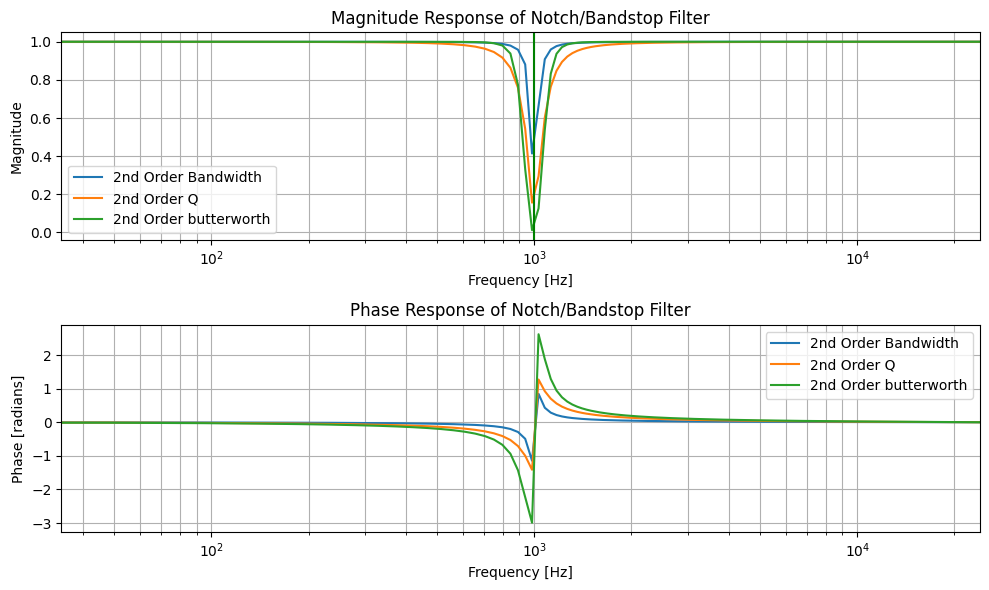

In [8]:
freq_hz_BW = w_BW * (fs / (2 * np.pi))

freq_hz_Q = w_Q * (fs / (2 * np.pi))

freq_hz_2p = w_2 * (fs / (2 * np.pi))

freq_hz_3p = w_3 * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz_BW, np.abs(H_BW), label='2nd Order Bandwidth')
plt.plot(freq_hz_Q, np.abs(H_Q), label='2nd Order Q')
plt.plot(freq_hz_2p, np.abs(H_2), label='2nd Order butterworth')
plt.title('Magnitude Response of Notch/Bandstop Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.axvline(corner_freq, color='green')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(freq_hz_BW, np.angle(H_BW), label='2nd Order Bandwidth')
plt.plot(freq_hz_Q, np.angle(H_Q), label='2nd Order Q')
plt.plot(freq_hz_2p, np.angle(H_2), label='2nd Order butterworth')
plt.title('Phase Response of Notch/Bandstop Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.legend()


plt.tight_layout()
plt.show()